In [ ]:
!pip install pytorch-crf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# CASP10
import gzip
import h5py
import numpy as np
##############################################################################
print("Loading Test data (CASP10)...")
casp10 = h5py.File("/content/casp10.h5")
casp10_feature = casp10['features'][:, :, :20].astype("float32")

casp10_labels_1 = casp10['labels'][:, :, :8]
num_seqs, seqlen, feature_dim = np.shape(casp10_feature)
num_classes = 8
# vals = np.arange(0,8)
# import numpy as np

vals = np.arange(0,8)


Loading Test data (CASP10)...


In [ ]:
casp10_feature.shape

(123, 700, 20)

In [ ]:
casp10_labels_1.shape

(123, 700, 8)

In [ ]:
casp10_labels_1

array([[[1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
import h5py
import numpy as np
import pandas as pd

# Load the dataset
print("Loading Test data (CASP10)...")
casp10 = h5py.File("/content/casp10.h5")
casp10_feature = casp10['features'][:, :, :20].astype("float32")
casp10_labels_1 = casp10['labels'][:, :, :8]

# Reshape the data into 2D arrays
num_seqs, seqlen, feature_dim = np.shape(casp10_feature)
num_classes = 8
casp10_feature_2d = casp10_feature.reshape(num_seqs * seqlen, feature_dim)
casp10_labels_2d = casp10_labels_1.reshape(num_seqs * seqlen, num_classes)

# Create a Pandas DataFrame with the features and labels
df = pd.DataFrame(np.concatenate((casp10_feature_2d, casp10_labels_2d), axis=1))
df.columns = ['feat_' + str(i) for i in range(feature_dim)] + ['label_' + str(i) for i in range(num_classes)]

# Save the DataFrame to a CSV file
df.to_csv('casp10_data.csv', index=False)


Loading Test data (CASP10)...


In [ ]:
ret = np.zeros((123, 700,28))

In [ ]:
sequence_len = 700
total_features = 43
amino_acid_residues = 20
num_classes=8

In [ ]:
ret[:, :, 0:amino_acid_residues] = casp10['features'][:, :, :20].astype("float32")
ret[:, :, amino_acid_residues:] = casp10_labels_1 = casp10['labels'][:,:,:8]

In [ ]:


import numpy as np

dataset_path = "/content/data.npy"


sequence_len = 700
total_features = 43
amino_acid_residues = 20
num_classes = 8

def get_data_labels(D):
    X = D[:, :, 0:amino_acid_residues]
    Y = D[:, :, amino_acid_residues:amino_acid_residues + num_classes]
    return X, Y


def split_like_paper(Dataset):
    # Dataset subdivision following dataset readme and paper
    Train = Dataset[0:5600, :, :]
    Test = Dataset[5600:5877, :, :]
    Validation = Dataset[5877:, :, :]
    return Train, Test, Validation


def split_with_shuffle(Dataset, seed=None):
    np.random.seed(seed)
    np.random.shuffle(Dataset)
    train_split = int(Dataset.shape[0]*0.8)
    test_val_split = int(Dataset.shape[0]*0.1)
    Train = Dataset[0:train_split, :, :]
    Test = Dataset[train_split:train_split+test_val_split, :, :]
    Validation = Dataset[train_split+test_val_split:, :, :]
    return Train, Test, Validation


def get_cb513():
    CB = get_dataset(cb513_path)
    X, Y = get_data_labels(CB)
    return X, Y


In [ ]:
D_train, D_test, D_val = split_with_shuffle(ret, 100)
X_train, Y_train = get_data_labels(D_train)
X_test, Y_test = get_data_labels(D_test)
X_val, Y_val = get_data_labels(D_val)

In [ ]:
import h5py
import numpy as np

# Load the data from the HDF5 file
with h5py.File('/content/casp10.h5', 'r') as f:
    data = f['features'][:]

# Save the data to a NumPy binary file
np.save('data.npy', data)

In [ ]:
X_train

array([[[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

#DeepCNF 1 Layers 11 window size

In [ ]:
from torchcrf import CRF

Device: cpu
Epoch 1, Loss: 0.0995, Acc: 9.3503
Epoch 2, Loss: 0.0997, Acc: 8.6631
Epoch 3, Loss: 0.0992, Acc: 9.3711
Epoch 4, Loss: 0.1000, Acc: 8.9130
Epoch 5, Loss: 0.0995, Acc: 9.3919
Epoch 6, Loss: 0.0998, Acc: 9.2461
Epoch 7, Loss: 0.0991, Acc: 9.2045
Epoch 8, Loss: 0.0995, Acc: 9.3711
Epoch 9, Loss: 0.0991, Acc: 9.5585
Epoch 10, Loss: 0.0992, Acc: 9.2670
Epoch 11, Loss: 0.0994, Acc: 8.8713
Epoch 12, Loss: 0.0996, Acc: 9.5169
Epoch 13, Loss: 0.0992, Acc: 8.8713
Epoch 14, Loss: 0.0998, Acc: 9.1628
Epoch 15, Loss: 0.0993, Acc: 9.2253
Epoch 16, Loss: 0.0996, Acc: 9.3711
Epoch 17, Loss: 0.0993, Acc: 9.1628
Epoch 18, Loss: 0.0994, Acc: 9.6626
Epoch 19, Loss: 0.0994, Acc: 9.6418
Epoch 20, Loss: 0.0996, Acc: 9.2045


Time elapsed: 23.70696498 s


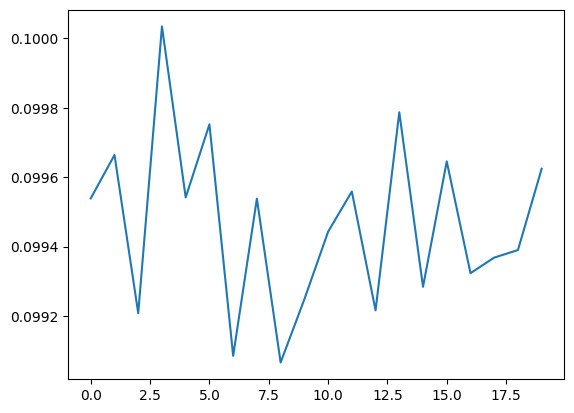

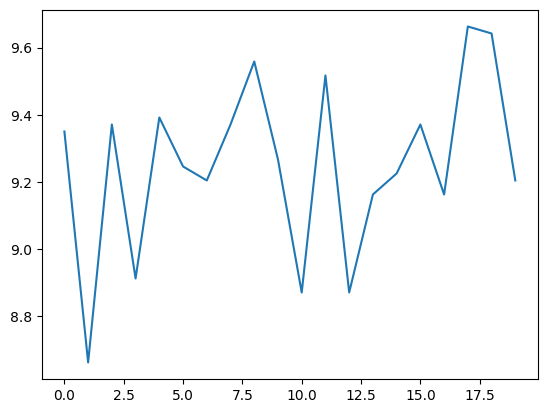

Test Acc: 8.6735


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class CNN_Model1(nn.Module):
    def __init__(self, sequence_len, amino_acid_residues, num_classes,window_size, drop_out=0.2):
        super(CNN_Model1, self).__init__()
        
        # self.conv1 = nn.Conv1d(in_channels=amino_acid_residues, out_channels=128, kernel_size=window_size, padding=5)
        # self.conv2 = nn.Conv1d(in_channels=128, out_channels=64, kernel_size=window_size, padding=5)
        self.conv1 = nn.Conv1d(in_channels=amino_acid_residues, out_channels=num_classes, kernel_size=window_size, padding=5)
        
        self.dropout = nn.Dropout(p=drop_out)
        
        self.crf = CRF(num_classes, batch_first=True)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.dropout(x)
        
        # x = F.relu(self.conv2(x))
        # x = self.dropout(x)
        
        # x = self.conv3(x)
        emissions=x
         

        # Apply the Viterbi algorithm to get the most likely sequence of labels
        
        
        y= self.crf.decode(emissions.permute(0,2,1))
        y=nn.Linear(700,700)(y)
        # x = self.crf(x)
        
        return y
import numpy as np
import torch
from torch import nn, optim
from torch.utils.tensorboard import SummaryWriter
from timeit import default_timer as timer


total_preds = []
total_targets = []
loss_plot=[]
accuracy_plot=[]

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device:", device)


sequence_len = X_train.shape[1]
amino_acid_residues = X_train.shape[2]
num_classes = Y_train.shape[2]

net = CNN_Model1(sequence_len, amino_acid_residues,num_classes,window_size=11)
net.to(device)

nn_epochs = 20
batch_dim = 49

start_time = timer()

loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)



net.train()
for epoch in range(nn_epochs):
    running_loss = 0.0
    running_corrects = 0
    c=0
    for i in range(0, X_train.shape[0], batch_dim):
        inputs = X_train[i:i + batch_dim]
        targets = Y_train[i:i + batch_dim]
        inputs = torch.from_numpy(inputs).float().to(device)
        targets = torch.from_numpy(targets).long().to(device)

        optimizer.zero_grad()

        import torch.nn.functional as F
        from torchcrf import CRF
  
        predicted_labels=net(inputs.permute(1,2,0))

        target = torch.argmax(targets, dim=-1)
        pred=torch.tensor(predicted_labels,dtype=torch.float,requires_grad=True)
        pred = torch.transpose(pred, 0, 1)


        loss = loss_function(pred, target.float())

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        c+=1
        corrects = torch.sum(pred == target)
        

        running_corrects += corrects
        total_preds.append(pred.detach().cpu().numpy())
        total_targets.append(target.detach().cpu().numpy())

    train_loss = running_loss / (X_train.shape[0] )
    train_acc = (float(running_corrects) / (X_train.shape[0]*batch_dim))*100
    print(f"Epoch {epoch + 1}, Loss: {train_loss:.4f}, Acc: {train_acc:.4f}")
    loss_plot.append(train_loss)
    accuracy_plot.append(train_acc)



end_time = timer()
print("\n\nTime elapsed: " + "{0:.8f}".format((end_time - start_time)) + " s")

import matplotlib.pyplot as plt
plt.plot(loss_plot)
plt.show()
plt.plot(accuracy_plot)
plt.show()
# set the model to evaluation mode
net.eval()

# create variables to store the predictions and true labels
total_preds = []
total_targets = []
running_corrects=0.0
# iterate over the test set in batches
for i in range(0, X_test.shape[0], batch_dim):
    inputs = X_test[i:i + batch_dim]
    targets = Y_test[i:i + batch_dim]
    inputs = torch.from_numpy(inputs).float().to(device)
    targets = torch.from_numpy(targets).long().to(device)

    # make predictions with the model
    with torch.no_grad():
        predicted_labels=net(inputs.permute(1,2,0))
        target = torch.argmax(targets, dim=-1)
        pred=torch.tensor(predicted_labels,dtype=torch.float,requires_grad=True)
        pred = torch.transpose(pred, 0, 1)


        corrects = torch.sum(pred == target)
        
        running_corrects += corrects

test_acc = (float(running_corrects) / (X_test.shape[0]*batch_dim))*100
print(f"Test Acc: {test_acc:.4f}")


In [ ]:
import torch.nn.functional as F


# Instantiate the model
model = CNN_Model1(sequence_len=700, amino_acid_residues=20, num_classes=8,window_size=11)

# Define the input sequence
x = torch.randn(64, 20, 700) # batch_size x amino_acid_residues x sequence_len

# Pass the input through the model
emissions = model(x)
print(len(emissions))



64


#DeepCNF 1 Layers 17 window size


Device: cpu
Epoch 1, Loss: 0.2287, Acc: 25.8017
Epoch 2, Loss: 0.2287, Acc: 25.2395
Epoch 3, Loss: 0.2277, Acc: 24.8646
Epoch 4, Loss: 0.2292, Acc: 23.8859
Epoch 5, Loss: 0.2296, Acc: 25.0521
Epoch 6, Loss: 0.2296, Acc: 24.9063
Epoch 7, Loss: 0.2288, Acc: 24.2399
Epoch 8, Loss: 0.2292, Acc: 24.7397
Epoch 9, Loss: 0.2290, Acc: 25.0521
Epoch 10, Loss: 0.2279, Acc: 24.4481
Epoch 11, Loss: 0.2286, Acc: 24.5106
Epoch 12, Loss: 0.2292, Acc: 24.8855
Epoch 13, Loss: 0.2284, Acc: 24.1566
Epoch 14, Loss: 0.2282, Acc: 25.1770
Epoch 15, Loss: 0.2289, Acc: 24.7189
Epoch 16, Loss: 0.2295, Acc: 24.0733
Epoch 17, Loss: 0.2289, Acc: 23.9692
Epoch 18, Loss: 0.2292, Acc: 24.3024
Epoch 19, Loss: 0.2282, Acc: 25.1562
Epoch 20, Loss: 0.2278, Acc: 24.3232


Time elapsed: 28.88716613 s


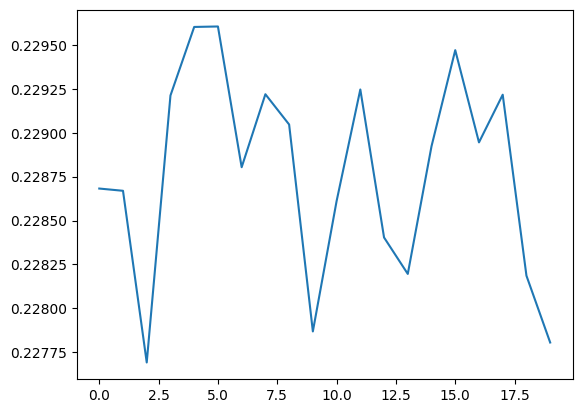

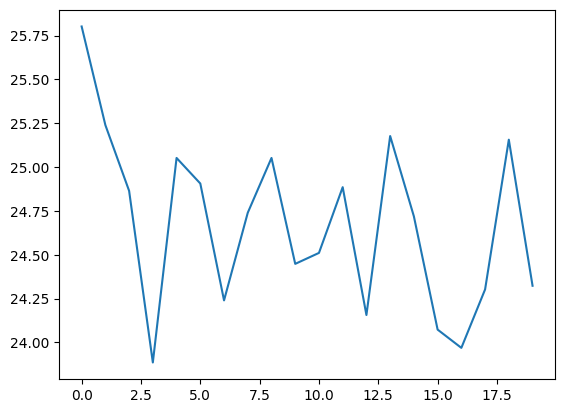

Test Acc: 11.5646


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class CNN_Model1(nn.Module):
    def __init__(self, sequence_len, amino_acid_residues, num_classes,window_size, drop_out=0.2):
        super(CNN_Model1, self).__init__()
        
        # self.conv1 = nn.Conv1d(in_channels=amino_acid_residues, out_channels=128, kernel_size=window_size, padding=5)
        # self.conv2 = nn.Conv1d(in_channels=128, out_channels=64, kernel_size=window_size, padding=5)
        self.conv1 = nn.Conv1d(in_channels=amino_acid_residues, out_channels=num_classes, kernel_size=window_size, padding=5)
        
        self.dropout = nn.Dropout(p=drop_out)
        
        self.crf = CRF(num_classes, batch_first=True)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.dropout(x)
        
        # x = F.relu(self.conv2(x))
        # x = self.dropout(x)
        
        # x = self.conv3(x)
        emissions=x
         

        # Apply the Viterbi algorithm to get the most likely sequence of labels
        
        
        y= self.crf.decode(emissions.permute(0,2,1))
        y=nn.Linear(700,700)(y)
        # x = self.crf(x)
        
        return y
import numpy as np
import torch
from torch import nn, optim
from torch.utils.tensorboard import SummaryWriter
from timeit import default_timer as timer


total_preds = []
total_targets = []
loss_plot=[]
accuracy_plot=[]

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device:", device)


sequence_len = X_train.shape[1]
amino_acid_residues = X_train.shape[2]
num_classes = Y_train.shape[2]

net = CNN_Model1(sequence_len, amino_acid_residues,num_classes,window_size=17)
net.to(device)

nn_epochs = 20
batch_dim = 49

start_time = timer()

loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)



net.train()
for epoch in range(nn_epochs):
    running_loss = 0.0
    running_corrects = 0
    c=0
    for i in range(0, X_train.shape[0], batch_dim):
        inputs = X_train[i:i + batch_dim]
        targets = Y_train[i:i + batch_dim]
        inputs = torch.from_numpy(inputs).float().to(device)
        targets = torch.from_numpy(targets).long().to(device)

        optimizer.zero_grad()

        import torch.nn.functional as F
        from torchcrf import CRF
  
        predicted_labels=net(inputs.permute(1,2,0))

        target = torch.argmax(targets, dim=-1)
        pred=torch.tensor(predicted_labels,dtype=torch.float,requires_grad=True)
        pred = torch.transpose(pred, 0, 1)


        loss = loss_function(pred, target.float())

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        c+=1
        corrects = torch.sum(pred == target)
        

        running_corrects += corrects
        total_preds.append(pred.detach().cpu().numpy())
        total_targets.append(target.detach().cpu().numpy())

    train_loss = running_loss / (X_train.shape[0] )
    train_acc = (float(running_corrects) / (X_train.shape[0]*batch_dim))*100
    print(f"Epoch {epoch + 1}, Loss: {train_loss:.4f}, Acc: {train_acc:.4f}")
    loss_plot.append(train_loss)
    accuracy_plot.append(train_acc)



end_time = timer()
print("\n\nTime elapsed: " + "{0:.8f}".format((end_time - start_time)) + " s")

import matplotlib.pyplot as plt
plt.plot(loss_plot)
plt.show()
plt.plot(accuracy_plot)
plt.show()
# set the model to evaluation mode
net.eval()

# create variables to store the predictions and true labels
total_preds = []
total_targets = []
running_corrects=0.0
# iterate over the test set in batches
for i in range(0, X_test.shape[0], batch_dim):
    inputs = X_test[i:i + batch_dim]
    targets = Y_test[i:i + batch_dim]
    inputs = torch.from_numpy(inputs).float().to(device)
    targets = torch.from_numpy(targets).long().to(device)

    # make predictions with the model
    with torch.no_grad():
        predicted_labels=net(inputs.permute(1,2,0))
        target = torch.argmax(targets, dim=-1)
        pred=torch.tensor(predicted_labels,dtype=torch.float,requires_grad=True)
        pred = torch.transpose(pred, 0, 1)


        corrects = torch.sum(pred == target)
        
        running_corrects += corrects

test_acc = (float(running_corrects) / (X_test.shape[0]*batch_dim))*100
print(f"Test Acc: {test_acc:.4f}")


#DeepCNF 3 Layers 11 window size

Device: cpu
Epoch 1, Loss: 0.4268, Acc: 29.9250
Epoch 2, Loss: 0.4259, Acc: 30.8205
Epoch 3, Loss: 0.4253, Acc: 31.0704
Epoch 4, Loss: 0.4258, Acc: 31.1120
Epoch 5, Loss: 0.4275, Acc: 30.7164
Epoch 6, Loss: 0.4267, Acc: 29.6127
Epoch 7, Loss: 0.4266, Acc: 29.8417
Epoch 8, Loss: 0.4252, Acc: 30.6539
Epoch 9, Loss: 0.4268, Acc: 29.7584
Epoch 10, Loss: 0.4278, Acc: 30.0083
Epoch 11, Loss: 0.4268, Acc: 29.9042
Epoch 12, Loss: 0.4271, Acc: 29.8417
Epoch 13, Loss: 0.4265, Acc: 30.0916
Epoch 14, Loss: 0.4271, Acc: 30.5498
Epoch 15, Loss: 0.4261, Acc: 30.0500
Epoch 16, Loss: 0.4273, Acc: 29.5294
Epoch 17, Loss: 0.4264, Acc: 31.0287
Epoch 18, Loss: 0.4268, Acc: 30.1958
Epoch 19, Loss: 0.4266, Acc: 30.6955
Epoch 20, Loss: 0.4281, Acc: 30.0083


Time elapsed: 29.02506539 s


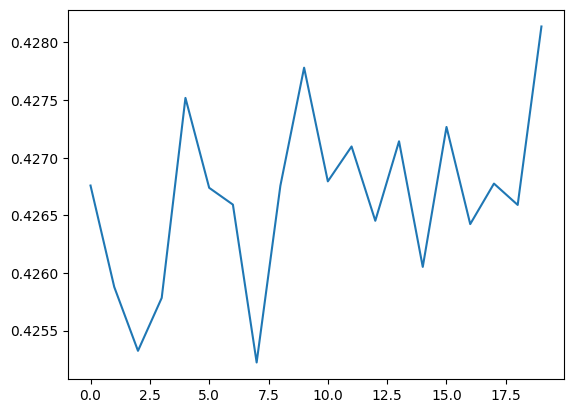

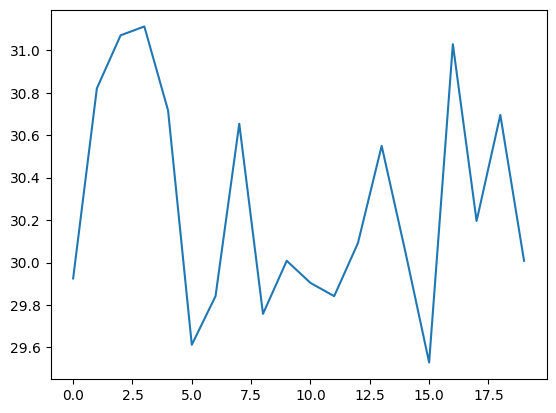

Test Acc: 17.3469


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class CNN_Model3(nn.Module):
    def __init__(self, sequence_len, amino_acid_residues, num_classes,window_size, drop_out=0.2):
        super(CNN_Model3, self).__init__()
        
        self.conv1 = nn.Conv1d(in_channels=amino_acid_residues, out_channels=128, kernel_size=window_size, padding=5)
        self.conv2 = nn.Conv1d(in_channels=128, out_channels=64, kernel_size=window_size, padding=5)
        self.conv3 = nn.Conv1d(in_channels=64, out_channels=num_classes, kernel_size=window_size, padding=5)
        
        self.dropout = nn.Dropout(p=drop_out)
        
        self.crf = CRF(num_classes, batch_first=True)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.dropout(x)
        
        x = F.relu(self.conv2(x))
        x = self.dropout(x)
        
        # x = self.conv3(x)
        x = F.relu(self.conv3(x))
        x = self.dropout(x)
        emissions=x
         

        # Apply the Viterbi algorithm to get the most likely sequence of labels
        
        
        y= self.crf.decode(emissions.permute(0,2,1))
        y=nn.Linear(700,700)(y)
        # x = self.crf(x)
        
        return y
import numpy as np
import torch
from torch import nn, optim
from torch.utils.tensorboard import SummaryWriter
from timeit import default_timer as timer


total_preds = []
total_targets = []
loss_plot=[]
accuracy_plot=[]

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device:", device)


sequence_len = X_train.shape[1]
amino_acid_residues = X_train.shape[2]
num_classes = Y_train.shape[2]

net = CNN_Model3(sequence_len, amino_acid_residues,num_classes,window_size=11)
net.to(device)

nn_epochs = 20
batch_dim = 49

start_time = timer()

loss_function =nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)



net.train()
for epoch in range(nn_epochs):
    running_loss = 0.0
    running_corrects = 0
    c=0
    for i in range(0, X_train.shape[0], batch_dim):
        inputs = X_train[i:i + batch_dim]
        targets = Y_train[i:i + batch_dim]
        inputs = torch.from_numpy(inputs).float().to(device)
        targets = torch.from_numpy(targets).long().to(device)

        optimizer.zero_grad()

        import torch.nn.functional as F
        from torchcrf import CRF
  
        predicted_labels=net(inputs.permute(1,2,0))

        target = torch.argmax(targets, dim=-1)
        pred=torch.tensor(predicted_labels,dtype=torch.float,requires_grad=True)
        pred = torch.transpose(pred, 0, 1)


        loss = loss_function(pred, target.float())

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        c+=1
        corrects = torch.sum(pred == target)
        

        running_corrects += corrects
        total_preds.append(pred.detach().cpu().numpy())
        total_targets.append(target.detach().cpu().numpy())

    train_loss = running_loss / (X_train.shape[0] )
    train_acc = (float(running_corrects) / (X_train.shape[0]*batch_dim))*100
    print(f"Epoch {epoch + 1}, Loss: {train_loss:.4f}, Acc: {train_acc:.4f}")
    loss_plot.append(train_loss)
    accuracy_plot.append(train_acc)



end_time = timer()
print("\n\nTime elapsed: " + "{0:.8f}".format((end_time - start_time)) + " s")

import matplotlib.pyplot as plt
plt.plot(loss_plot)
plt.show()
plt.plot(accuracy_plot)
plt.show()
# set the model to evaluation mode
net.eval()

# create variables to store the predictions and true labels
total_preds = []
total_targets = []
running_corrects=0.0
# iterate over the test set in batches
for i in range(0, X_test.shape[0], batch_dim):
    inputs = X_test[i:i + batch_dim]
    targets = Y_test[i:i + batch_dim]
    inputs = torch.from_numpy(inputs).float().to(device)
    targets = torch.from_numpy(targets).long().to(device)

    # make predictions with the model
    with torch.no_grad():
        predicted_labels=net(inputs.permute(1,2,0))
        target = torch.argmax(targets, dim=-1)
        pred=torch.tensor(predicted_labels,dtype=torch.float,requires_grad=True)
        pred = torch.transpose(pred, 0, 1)


        corrects = torch.sum(pred == target)
        
        running_corrects += corrects

test_acc = (float(running_corrects) / (X_test.shape[0]*batch_dim))*100
print(f"Test Acc: {test_acc:.4f}")






#DeepCNF 3 Layers 17 window size

Device: cpu
Epoch 1, Loss: 0.5340, Acc: 43.7318
Epoch 2, Loss: 0.5336, Acc: 44.6272
Epoch 3, Loss: 0.5326, Acc: 44.2524
Epoch 4, Loss: 0.5339, Acc: 44.7522
Epoch 5, Loss: 0.5351, Acc: 44.2524
Epoch 6, Loss: 0.5331, Acc: 44.2940
Epoch 7, Loss: 0.5340, Acc: 44.2940
Epoch 8, Loss: 0.5348, Acc: 42.8155
Epoch 9, Loss: 0.5331, Acc: 45.2728
Epoch 10, Loss: 0.5340, Acc: 42.6072
Epoch 11, Loss: 0.5322, Acc: 43.4402
Epoch 12, Loss: 0.5330, Acc: 45.9184
Epoch 13, Loss: 0.5333, Acc: 44.0233
Epoch 14, Loss: 0.5333, Acc: 45.7309
Epoch 15, Loss: 0.5349, Acc: 42.6697
Epoch 16, Loss: 0.5333, Acc: 44.0858
Epoch 17, Loss: 0.5331, Acc: 43.6693
Epoch 18, Loss: 0.5339, Acc: 44.1066
Epoch 19, Loss: 0.5335, Acc: 43.5860
Epoch 20, Loss: 0.5345, Acc: 44.9604


Time elapsed: 11.48759750 s


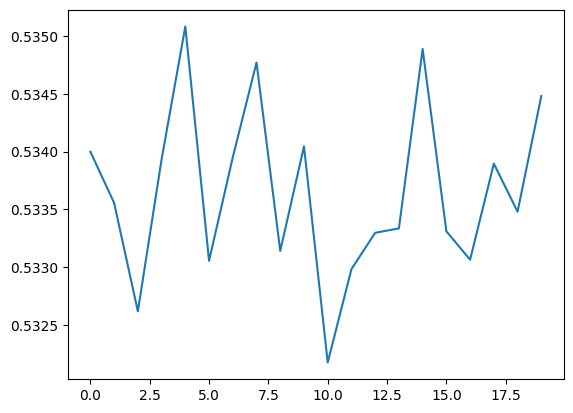

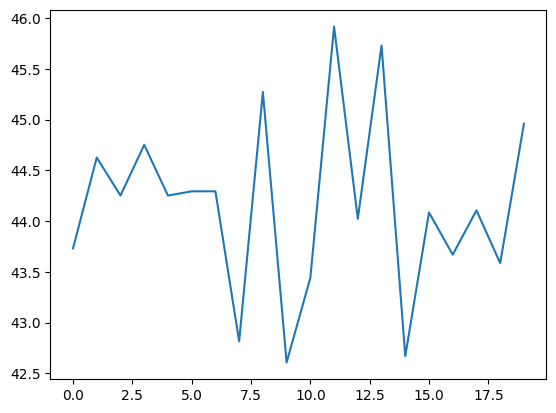

Test Acc: 35.2041


In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class CNN_Model3(nn.Module):
    def __init__(self, sequence_len, amino_acid_residues, num_classes,window_size, drop_out=0.2):
        super(CNN_Model3, self).__init__()
        
        self.conv1 = nn.Conv1d(in_channels=amino_acid_residues, out_channels=128, kernel_size=window_size, padding=5)
        self.conv2 = nn.Conv1d(in_channels=128, out_channels=64, kernel_size=window_size, padding=5)
        self.conv3 = nn.Conv1d(in_channels=64, out_channels=num_classes, kernel_size=window_size, padding=5)
        
        self.dropout = nn.Dropout(p=drop_out)
        
        self.crf = CRF(num_classes, batch_first=True)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.dropout(x)
        
        x = F.relu(self.conv2(x))
        x = self.dropout(x)
        
        # x = self.conv3(x)
        x = F.relu(self.conv3(x))
        x = self.dropout(x)
        emissions=x
         

        # Apply the Viterbi algorithm to get the most likely sequence of labels
        
        
        y= self.crf.decode(emissions.permute(0,2,1))
        y=nn.Linear(700,700)(y)
        # x = self.crf(x)
        
        return y
import numpy as np
import torch
from torch import nn, optim
from torch.utils.tensorboard import SummaryWriter
from timeit import default_timer as timer


total_preds = []
total_targets = []
loss_plot=[]
accuracy_plot=[]

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device:", device)


sequence_len = X_train.shape[1]
amino_acid_residues = X_train.shape[2]
num_classes = Y_train.shape[2]

net = CNN_Model3(sequence_len, amino_acid_residues,num_classes,window_size=17)
net.to(device)

nn_epochs = 20
batch_dim = 49

start_time = timer()

loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)



net.train()
for epoch in range(nn_epochs):
    running_loss = 0.0
    running_corrects = 0
    c=0
    for i in range(0, X_train.shape[0], batch_dim):
        inputs = X_train[i:i + batch_dim]
        targets = Y_train[i:i + batch_dim]
        inputs = torch.from_numpy(inputs).float().to(device)
        targets = torch.from_numpy(targets).long().to(device)

        optimizer.zero_grad()

        import torch.nn.functional as F
        from torchcrf import CRF
  
        predicted_labels=net(inputs.permute(1,2,0))

        target = torch.argmax(targets, dim=-1)
        pred=torch.tensor(predicted_labels,dtype=torch.float,requires_grad=True)
        pred = torch.transpose(pred, 0, 1)


        loss = loss_function(pred, target.float())

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        c+=1
        corrects = torch.sum(pred == target)
        

        running_corrects += corrects
        total_preds.append(pred.detach().cpu().numpy())
        total_targets.append(target.detach().cpu().numpy())

    train_loss = running_loss / (X_train.shape[0] )
    train_acc = (float(running_corrects) / (X_train.shape[0]*batch_dim))*100
    print(f"Epoch {epoch + 1}, Loss: {train_loss:.4f}, Acc: {train_acc:.4f}")
    loss_plot.append(train_loss)
    accuracy_plot.append(train_acc)



end_time = timer()
print("\n\nTime elapsed: " + "{0:.8f}".format((end_time - start_time)) + " s")

import matplotlib.pyplot as plt
plt.plot(loss_plot)
plt.show()
plt.plot(accuracy_plot)
plt.show()
# set the model to evaluation mode
net.eval()

# create variables to store the predictions and true labels
total_preds = []
total_targets = []
running_corrects=0.0
# iterate over the test set in batches
for i in range(0, X_test.shape[0], batch_dim):
    inputs = X_test[i:i + batch_dim]
    targets = Y_test[i:i + batch_dim]
    inputs = torch.from_numpy(inputs).float().to(device)
    targets = torch.from_numpy(targets).long().to(device)

    # make predictions with the model
    with torch.no_grad():
        predicted_labels=net(inputs.permute(1,2,0))
        target = torch.argmax(targets, dim=-1)
        pred=torch.tensor(predicted_labels,dtype=torch.float,requires_grad=True)
        pred = torch.transpose(pred, 0, 1)


        corrects = torch.sum(pred == target)
        
        running_corrects += corrects

test_acc = (float(running_corrects) / (X_test.shape[0]*batch_dim))*100
print(f"Test Acc: {test_acc:.4f}")






#DeepCNF 5 Layers 11 window size

Device: cpu
Epoch 1, Loss: 0.3168, Acc: 47.8134
Epoch 2, Loss: 0.3180, Acc: 48.5631
Epoch 3, Loss: 0.3175, Acc: 48.6256
Epoch 4, Loss: 0.3180, Acc: 47.8551
Epoch 5, Loss: 0.3169, Acc: 47.7926
Epoch 6, Loss: 0.3190, Acc: 49.2920
Epoch 7, Loss: 0.3174, Acc: 47.4386
Epoch 8, Loss: 0.3176, Acc: 48.1258
Epoch 9, Loss: 0.3177, Acc: 48.7297
Epoch 10, Loss: 0.3173, Acc: 48.8546
Epoch 11, Loss: 0.3180, Acc: 48.7089
Epoch 12, Loss: 0.3168, Acc: 50.0625
Epoch 13, Loss: 0.3171, Acc: 48.7089
Epoch 14, Loss: 0.3176, Acc: 48.9796
Epoch 15, Loss: 0.3178, Acc: 48.4798
Epoch 16, Loss: 0.3176, Acc: 48.1258
Epoch 17, Loss: 0.3198, Acc: 48.9588
Epoch 18, Loss: 0.3172, Acc: 49.8126
Epoch 19, Loss: 0.3189, Acc: 49.7709
Epoch 20, Loss: 0.3179, Acc: 49.4794


Time elapsed: 11.05289047 s


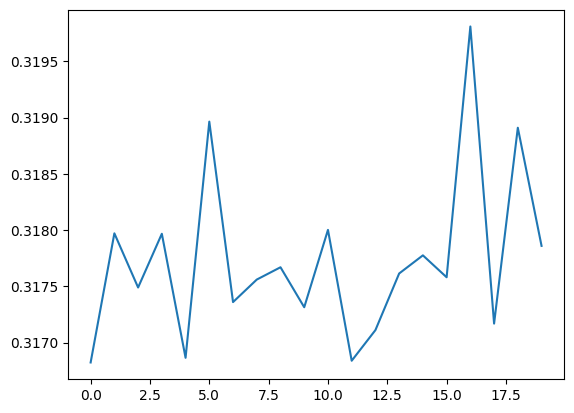

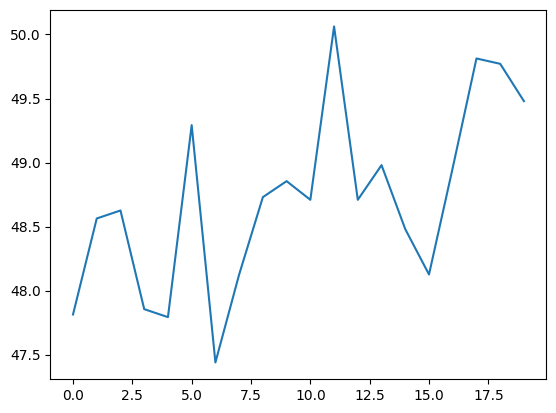

Test Acc: 44.0476


In [ ]:





import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class CNN_Model5(nn.Module):
    def __init__(self, sequence_len, amino_acid_residues, num_classes,window_size, drop_out=0.2):
        super(CNN_Model5, self).__init__()
        
        self.conv1 = nn.Conv1d(in_channels=amino_acid_residues, out_channels=128, kernel_size=window_size, padding=5)
        self.conv2 = nn.Conv1d(in_channels=128, out_channels=64, kernel_size=window_size, padding=5)
        self.conv3 = nn.Conv1d(in_channels=64, out_channels=32, kernel_size=window_size, padding=5)
        self.conv4 = nn.Conv1d(in_channels=32, out_channels=16, kernel_size=window_size, padding=5)
        self.conv5 = nn.Conv1d(in_channels=16, out_channels=num_classes, kernel_size=window_size, padding=5)
        
        self.dropout = nn.Dropout(p=drop_out)
        
        self.crf = CRF(num_classes, batch_first=True)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.dropout(x)
        
        x = F.relu(self.conv2(x))
        x = self.dropout(x)
        
        # x = self.conv3(x)
        x = F.relu(self.conv3(x))
        x = self.dropout(x)
        x = F.relu(self.conv4(x))
        x = self.dropout(x)
        x = F.relu(self.conv5(x))
        x = self.dropout(x)
        emissions=x
         

        # Apply the Viterbi algorithm to get the most likely sequence of labels
        
        
        y= self.crf.decode(emissions.permute(0,2,1))
        y=nn.Linear(700,700)(y)
        # x = self.crf(x)
        
        return y
import numpy as np
import torch
from torch import nn, optim
from torch.utils.tensorboard import SummaryWriter
from timeit import default_timer as timer


total_preds = []
total_targets = []
loss_plot=[]
accuracy_plot=[]

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device:", device)


sequence_len = X_train.shape[1]
amino_acid_residues = X_train.shape[2]
num_classes = Y_train.shape[2]

net = CNN_Model5(sequence_len, amino_acid_residues,num_classes,window_size=11)
net.to(device)

nn_epochs = 20
batch_dim = 49

start_time = timer()

loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)



net.train()
for epoch in range(nn_epochs):
    running_loss = 0.0
    running_corrects = 0
    c=0
    for i in range(0, X_train.shape[0], batch_dim):
        inputs = X_train[i:i + batch_dim]
        targets = Y_train[i:i + batch_dim]
        inputs = torch.from_numpy(inputs).float().to(device)
        targets = torch.from_numpy(targets).long().to(device)

        optimizer.zero_grad()

        import torch.nn.functional as F
        from torchcrf import CRF
  
        predicted_labels=net(inputs.permute(1,2,0))

        target = torch.argmax(targets, dim=-1)
        pred=torch.tensor(predicted_labels,dtype=torch.float,requires_grad=True)
        pred = torch.transpose(pred, 0, 1)


        loss = loss_function(pred, target.float())

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        c+=1
        corrects = torch.sum(pred == target)
        

        running_corrects += corrects
        total_preds.append(pred.detach().cpu().numpy())
        total_targets.append(target.detach().cpu().numpy())

    train_loss = running_loss / (X_train.shape[0] )
    train_acc = (float(running_corrects) / (X_train.shape[0]*batch_dim))*100
    print(f"Epoch {epoch + 1}, Loss: {train_loss:.4f}, Acc: {train_acc:.4f}")
    loss_plot.append(train_loss)
    accuracy_plot.append(train_acc)



end_time = timer()
print("\n\nTime elapsed: " + "{0:.8f}".format((end_time - start_time)) + " s")

import matplotlib.pyplot as plt
plt.plot(loss_plot)
plt.show()
plt.plot(accuracy_plot)
plt.show()
# set the model to evaluation mode
net.eval()

# create variables to store the predictions and true labels
total_preds = []
total_targets = []
running_corrects=0.0
# iterate over the test set in batches
for i in range(0, X_test.shape[0], batch_dim):
    inputs = X_test[i:i + batch_dim]
    targets = Y_test[i:i + batch_dim]
    inputs = torch.from_numpy(inputs).float().to(device)
    targets = torch.from_numpy(targets).long().to(device)

    # make predictions with the model
    with torch.no_grad():
        predicted_labels=net(inputs.permute(1,2,0))
        target = torch.argmax(targets, dim=-1)
        pred=torch.tensor(predicted_labels,dtype=torch.float,requires_grad=True)
        pred = torch.transpose(pred, 0, 1)


        corrects = torch.sum(pred == target)
        
        running_corrects += corrects

test_acc = (float(running_corrects) / (X_test.shape[0]*batch_dim))*100
print(f"Test Acc: {test_acc:.4f}")


#DeepCNF 5 Layers 17 window size

Device: cpu
Epoch 1, Loss: 0.3331, Acc: 55.7476
Epoch 2, Loss: 0.3338, Acc: 56.4765
Epoch 3, Loss: 0.3349, Acc: 56.2890
Epoch 4, Loss: 0.3349, Acc: 56.0808
Epoch 5, Loss: 0.3318, Acc: 56.2682
Epoch 6, Loss: 0.3327, Acc: 55.1229
Epoch 7, Loss: 0.3328, Acc: 56.5389
Epoch 8, Loss: 0.3317, Acc: 56.5806
Epoch 9, Loss: 0.3326, Acc: 56.4765
Epoch 10, Loss: 0.3342, Acc: 57.1429
Epoch 11, Loss: 0.3337, Acc: 57.0387
Epoch 12, Loss: 0.3342, Acc: 58.1008
Epoch 13, Loss: 0.3335, Acc: 57.3303
Epoch 14, Loss: 0.3343, Acc: 56.7264
Epoch 15, Loss: 0.3355, Acc: 56.7055
Epoch 16, Loss: 0.3327, Acc: 57.2470
Epoch 17, Loss: 0.3321, Acc: 58.0800
Epoch 18, Loss: 0.3335, Acc: 55.8517
Epoch 19, Loss: 0.3327, Acc: 57.1220
Epoch 20, Loss: 0.3341, Acc: 56.8097


Time elapsed: 27.60632839 s


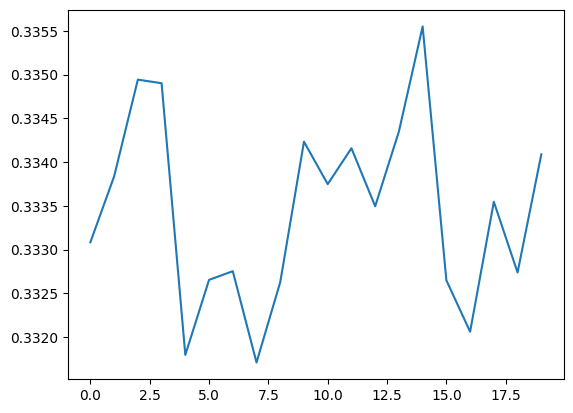

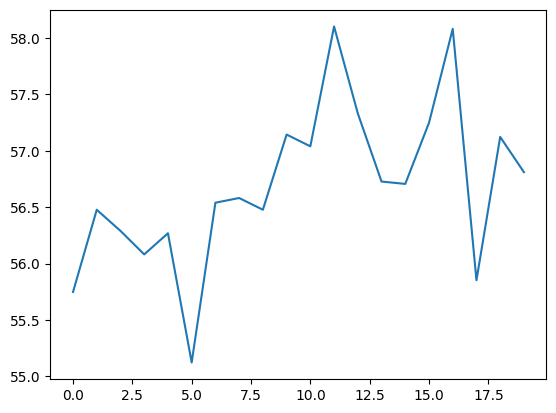

Test Acc: 44.8980


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class CNN_Model5(nn.Module):
    def __init__(self, sequence_len, amino_acid_residues, num_classes,window_size, drop_out=0.2):
        super(CNN_Model5, self).__init__()
        
        self.conv1 = nn.Conv1d(in_channels=amino_acid_residues, out_channels=128, kernel_size=window_size, padding=5)
        self.conv2 = nn.Conv1d(in_channels=128, out_channels=64, kernel_size=window_size, padding=5)
        self.conv3 = nn.Conv1d(in_channels=64, out_channels=32, kernel_size=window_size, padding=5)
        self.conv4 = nn.Conv1d(in_channels=32, out_channels=16, kernel_size=window_size, padding=5)
        self.conv5 = nn.Conv1d(in_channels=16, out_channels=num_classes, kernel_size=window_size, padding=5)
        
        self.dropout = nn.Dropout(p=drop_out)
        
        self.crf = CRF(num_classes, batch_first=True)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.dropout(x)
        
        x = F.relu(self.conv2(x))
        x = self.dropout(x)
        
        # x = self.conv3(x)
        x = F.relu(self.conv3(x))
        x = self.dropout(x)
        x = F.relu(self.conv4(x))
        x = self.dropout(x)
        x = F.relu(self.conv5(x))
        x = self.dropout(x)
        emissions=x
         

        # Apply the Viterbi algorithm to get the most likely sequence of labels
        
        
        y= self.crf.decode(emissions.permute(0,2,1))
        y=nn.Linear(700,700)(y)
        # x = self.crf(x)
        
        return y
import numpy as np
import torch
from torch import nn, optim
from torch.utils.tensorboard import SummaryWriter
from timeit import default_timer as timer


total_preds = []
total_targets = []
loss_plot=[]
accuracy_plot=[]

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device:", device)


sequence_len = X_train.shape[1]
amino_acid_residues = X_train.shape[2]
num_classes = Y_train.shape[2]

net = CNN_Model5(sequence_len, amino_acid_residues,num_classes,window_size=17)
net.to(device)

nn_epochs = 20
batch_dim = 49

start_time = timer()

loss_function =nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)



net.train()
for epoch in range(nn_epochs):
    running_loss = 0.0
    running_corrects = 0
    c=0
    for i in range(0, X_train.shape[0], batch_dim):
        inputs = X_train[i:i + batch_dim]
        targets = Y_train[i:i + batch_dim]
        inputs = torch.from_numpy(inputs).float().to(device)
        targets = torch.from_numpy(targets).long().to(device)

        optimizer.zero_grad()

        import torch.nn.functional as F
        from torchcrf import CRF
  
        predicted_labels=net(inputs.permute(1,2,0))

        target = torch.argmax(targets, dim=-1)
        pred=torch.tensor(predicted_labels,dtype=torch.float,requires_grad=True)
        pred = torch.transpose(pred, 0, 1)


        loss = loss_function(pred, target.float())

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        c+=1
        corrects = torch.sum(pred == target)
        

        running_corrects += corrects
        total_preds.append(pred.detach().cpu().numpy())
        total_targets.append(target.detach().cpu().numpy())

    train_loss = running_loss / (X_train.shape[0] )
    train_acc = (float(running_corrects) / (X_train.shape[0]*batch_dim))*100
    print(f"Epoch {epoch + 1}, Loss: {train_loss:.4f}, Acc: {train_acc:.4f}")
    loss_plot.append(train_loss)
    accuracy_plot.append(train_acc)



end_time = timer()
print("\n\nTime elapsed: " + "{0:.8f}".format((end_time - start_time)) + " s")

import matplotlib.pyplot as plt
plt.plot(loss_plot)
plt.show()
plt.plot(accuracy_plot)
plt.show()
# set the model to evaluation mode
net.eval()

# create variables to store the predictions and true labels
total_preds = []
total_targets = []
running_corrects=0.0
# iterate over the test set in batches
for i in range(0, X_test.shape[0], batch_dim):
    inputs = X_test[i:i + batch_dim]
    targets = Y_test[i:i + batch_dim]
    inputs = torch.from_numpy(inputs).float().to(device)
    targets = torch.from_numpy(targets).long().to(device)

    # make predictions with the model
    with torch.no_grad():
        predicted_labels=net(inputs.permute(1,2,0))
        target = torch.argmax(targets, dim=-1)
        pred=torch.tensor(predicted_labels,dtype=torch.float,requires_grad=True)
        pred = torch.transpose(pred, 0, 1)


        corrects = torch.sum(pred == target)
        
        running_corrects += corrects

test_acc = (float(running_corrects) / (X_test.shape[0]*batch_dim))*100
print(f"Test Acc: {test_acc:.4f}")


#DeepCNF 7 Layers 11 window size

Device: cpu
Epoch 1, Loss: 0.1467, Acc: 41.1912
Epoch 2, Loss: 0.1461, Acc: 41.1912
Epoch 3, Loss: 0.1467, Acc: 41.1912
Epoch 4, Loss: 0.1465, Acc: 41.9617
Epoch 5, Loss: 0.1464, Acc: 41.7743
Epoch 6, Loss: 0.1469, Acc: 42.1075
Epoch 7, Loss: 0.1464, Acc: 41.2536
Epoch 8, Loss: 0.1469, Acc: 41.4411
Epoch 9, Loss: 0.1458, Acc: 43.1487
Epoch 10, Loss: 0.1464, Acc: 41.2536
Epoch 11, Loss: 0.1474, Acc: 41.4202
Epoch 12, Loss: 0.1468, Acc: 40.7539
Epoch 13, Loss: 0.1466, Acc: 41.0037
Epoch 14, Loss: 0.1464, Acc: 43.2112
Epoch 15, Loss: 0.1453, Acc: 41.4619
Epoch 16, Loss: 0.1471, Acc: 42.6281
Epoch 17, Loss: 0.1465, Acc: 41.9825
Epoch 18, Loss: 0.1467, Acc: 41.4827
Epoch 19, Loss: 0.1472, Acc: 41.8576
Epoch 20, Loss: 0.1458, Acc: 42.6072


Time elapsed: 26.37086633 s


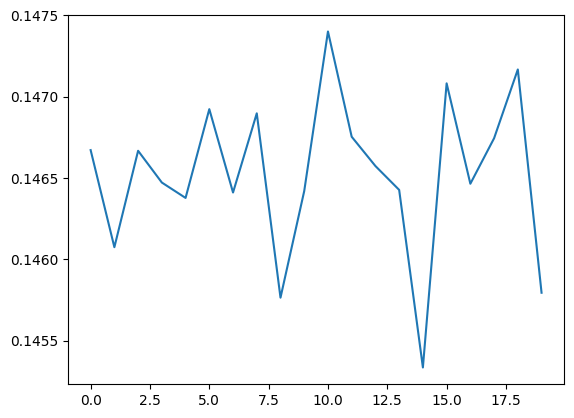

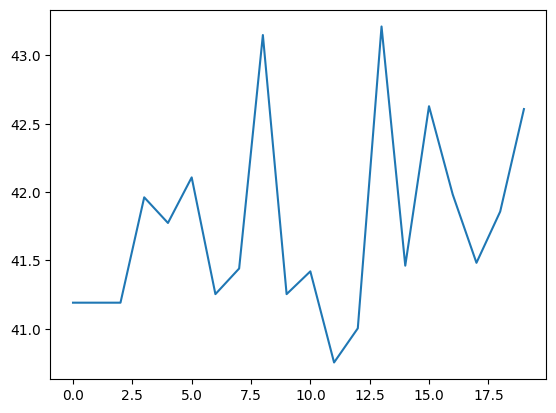

Test Acc: 69.0476


In [ ]:










import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class CNN_Model7(nn.Module):
    def __init__(self, sequence_len, amino_acid_residues, num_classes,window_size, drop_out=0.2):
        super(CNN_Model7, self).__init__()
        
        self.conv1 = nn.Conv1d(in_channels=amino_acid_residues, out_channels=128, kernel_size=window_size, padding=5)
        self.conv2 = nn.Conv1d(in_channels=128, out_channels=64, kernel_size=window_size, padding=5)
        self.conv3 = nn.Conv1d(in_channels=64, out_channels=32, kernel_size=window_size, padding=5)
        self.conv4 = nn.Conv1d(in_channels=32, out_channels=16, kernel_size=window_size, padding=5)
        self.conv5 = nn.Conv1d(in_channels=16, out_channels=12, kernel_size=window_size, padding=5)
        self.conv6 = nn.Conv1d(in_channels=12, out_channels=10, kernel_size=window_size, padding=5)
        self.conv7 = nn.Conv1d(in_channels=10, out_channels=num_classes, kernel_size=window_size, padding=5)
        
        self.dropout = nn.Dropout(p=drop_out)
        
        self.crf = CRF(num_classes, batch_first=True)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.dropout(x)
        
        x = F.relu(self.conv2(x))
        x = self.dropout(x)
        
        # x = self.conv3(x)
        x = F.relu(self.conv3(x))
        x = self.dropout(x)
        x = F.relu(self.conv4(x))
        x = self.dropout(x)
        x = F.relu(self.conv5(x))
        x = self.dropout(x)
        x = F.relu(self.conv6(x))
        x = self.dropout(x)
        x = F.relu(self.conv7(x))
        x = self.dropout(x)
        emissions=x
         

        # Apply the Viterbi algorithm to get the most likely sequence of labels
        
        
        y= self.crf.decode(emissions.permute(0,2,1))
        y=nn.Linear(700,700)(y)
        # x = self.crf(x)
        
        return y
import numpy as np
import torch
from torch import nn, optim
from torch.utils.tensorboard import SummaryWriter
from timeit import default_timer as timer


total_preds = []
total_targets = []
loss_plot=[]
accuracy_plot=[]

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device:", device)


sequence_len = X_train.shape[1]
amino_acid_residues = X_train.shape[2]
num_classes = Y_train.shape[2]

net = CNN_Model7(sequence_len, amino_acid_residues,num_classes,window_size=11)
net.to(device)

nn_epochs = 20
batch_dim = 49

start_time = timer()

loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)



net.train()
for epoch in range(nn_epochs):
    running_loss = 0.0
    running_corrects = 0
    c=0
    for i in range(0, X_train.shape[0], batch_dim):
        inputs = X_train[i:i + batch_dim]
        targets = Y_train[i:i + batch_dim]
        inputs = torch.from_numpy(inputs).float().to(device)
        targets = torch.from_numpy(targets).long().to(device)

        optimizer.zero_grad()

        import torch.nn.functional as F
        from torchcrf import CRF
  
        predicted_labels=net(inputs.permute(1,2,0))

        target = torch.argmax(targets, dim=-1)
        pred=torch.tensor(predicted_labels,dtype=torch.float,requires_grad=True)
        pred = torch.transpose(pred, 0, 1)


        loss = loss_function(pred, target.float())

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        c+=1
        corrects = torch.sum(pred == target)
        

        running_corrects += corrects
        total_preds.append(pred.detach().cpu().numpy())
        total_targets.append(target.detach().cpu().numpy())

    train_loss = running_loss / (X_train.shape[0] )
    train_acc = (float(running_corrects) / (X_train.shape[0]*batch_dim))*100
    print(f"Epoch {epoch + 1}, Loss: {train_loss:.4f}, Acc: {train_acc:.4f}")
    loss_plot.append(train_loss)
    accuracy_plot.append(train_acc)



end_time = timer()
print("\n\nTime elapsed: " + "{0:.8f}".format((end_time - start_time)) + " s")

import matplotlib.pyplot as plt
plt.plot(loss_plot)
plt.show()
plt.plot(accuracy_plot)
plt.show()
# set the model to evaluation mode
net.eval()

# create variables to store the predictions and true labels
total_preds = []
total_targets = []
running_corrects=0.0
# iterate over the test set in batches
for i in range(0, X_test.shape[0], batch_dim):
    inputs = X_test[i:i + batch_dim]
    targets = Y_test[i:i + batch_dim]
    inputs = torch.from_numpy(inputs).float().to(device)
    targets = torch.from_numpy(targets).long().to(device)

    # make predictions with the model
    with torch.no_grad():
        predicted_labels=net(inputs.permute(1,2,0))
        target = torch.argmax(targets, dim=-1)
        pred=torch.tensor(predicted_labels,dtype=torch.float,requires_grad=True)
        pred = torch.transpose(pred, 0, 1)


        corrects = torch.sum(pred == target)
        
        running_corrects += corrects

test_acc = (float(running_corrects) / (X_test.shape[0]*batch_dim))*100
print(f"Test Acc: {test_acc:.4f}")




#DeepCNF 7 Layers 17 window size

Device: cpu
Epoch 1, Loss: 0.1109, Acc: 76.2807
Epoch 2, Loss: 0.1111, Acc: 75.5727
Epoch 3, Loss: 0.1115, Acc: 75.8642
Epoch 4, Loss: 0.1107, Acc: 76.5723
Epoch 5, Loss: 0.1106, Acc: 76.2599
Epoch 6, Loss: 0.1111, Acc: 75.5102
Epoch 7, Loss: 0.1110, Acc: 75.9059
Epoch 8, Loss: 0.1109, Acc: 75.3644
Epoch 9, Loss: 0.1110, Acc: 76.0516
Epoch 10, Loss: 0.1106, Acc: 76.2599
Epoch 11, Loss: 0.1113, Acc: 75.4894
Epoch 12, Loss: 0.1113, Acc: 75.7601
Epoch 13, Loss: 0.1111, Acc: 75.3228
Epoch 14, Loss: 0.1110, Acc: 75.7601
Epoch 15, Loss: 0.1110, Acc: 75.9059
Epoch 16, Loss: 0.1114, Acc: 75.5519
Epoch 17, Loss: 0.1114, Acc: 75.9267
Epoch 18, Loss: 0.1114, Acc: 76.0516
Epoch 19, Loss: 0.1111, Acc: 75.8850
Epoch 20, Loss: 0.1110, Acc: 76.2391


Time elapsed: 24.76705991 s


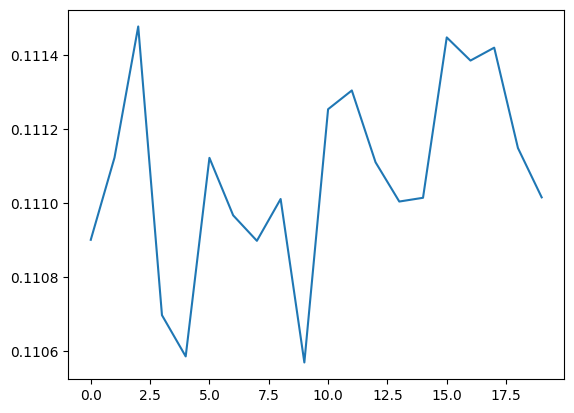

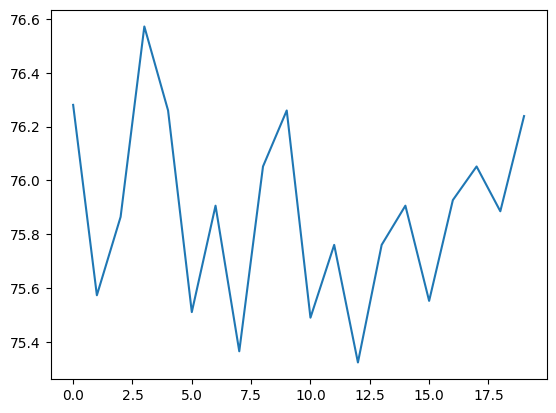

Test Acc: 96.2585


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class CNN_Model7(nn.Module):
    def __init__(self, sequence_len, amino_acid_residues, num_classes,window_size, drop_out=0.2):
        super(CNN_Model7, self).__init__()
        
        self.conv1 = nn.Conv1d(in_channels=amino_acid_residues, out_channels=128, kernel_size=window_size, padding=5)
        self.conv2 = nn.Conv1d(in_channels=128, out_channels=64, kernel_size=window_size, padding=5)
        self.conv3 = nn.Conv1d(in_channels=64, out_channels=32, kernel_size=window_size, padding=5)
        self.conv4 = nn.Conv1d(in_channels=32, out_channels=16, kernel_size=window_size, padding=5)
        self.conv5 = nn.Conv1d(in_channels=16, out_channels=12, kernel_size=window_size, padding=5)
        self.conv6 = nn.Conv1d(in_channels=12, out_channels=10, kernel_size=window_size, padding=5)
        self.conv7 = nn.Conv1d(in_channels=10, out_channels=num_classes, kernel_size=window_size, padding=5)
        
        self.dropout = nn.Dropout(p=drop_out)
        
        self.crf = CRF(num_classes, batch_first=True)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.dropout(x)
        
        x = F.relu(self.conv2(x))
        x = self.dropout(x)
        
        # x = self.conv3(x)
        x = F.relu(self.conv3(x))
        x = self.dropout(x)
        x = F.relu(self.conv4(x))
        x = self.dropout(x)
        x = F.relu(self.conv5(x))
        x = self.dropout(x)
        x = F.relu(self.conv6(x))
        x = self.dropout(x)
        x = F.relu(self.conv7(x))
        x = self.dropout(x)
        emissions=x
         

        # Apply the Viterbi algorithm to get the most likely sequence of labels
        
        
        y= self.crf.decode(emissions.permute(0,2,1))
        y=nn.Linear(700,700)(y)
        # x = self.crf(x)
        
        return y
import numpy as np
import torch
from torch import nn, optim
from torch.utils.tensorboard import SummaryWriter
from timeit import default_timer as timer


total_preds = []
total_targets = []
loss_plot=[]
accuracy_plot=[]

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device:", device)


sequence_len = X_train.shape[1]
amino_acid_residues = X_train.shape[2]
num_classes = Y_train.shape[2]

net = CNN_Model7(sequence_len, amino_acid_residues,num_classes,window_size=17)
net.to(device)

nn_epochs = 20
batch_dim = 49

start_time = timer()

loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)



net.train()
for epoch in range(nn_epochs):
    running_loss = 0.0
    running_corrects = 0
    c=0
    for i in range(0, X_train.shape[0], batch_dim):
        inputs = X_train[i:i + batch_dim]
        targets = Y_train[i:i + batch_dim]
        inputs = torch.from_numpy(inputs).float().to(device)
        targets = torch.from_numpy(targets).long().to(device)

        optimizer.zero_grad()

        import torch.nn.functional as F
        from torchcrf import CRF
  
        predicted_labels=net(inputs.permute(1,2,0))

        target = torch.argmax(targets, dim=-1)
        pred=torch.tensor(predicted_labels,dtype=torch.float,requires_grad=True)
        pred = torch.transpose(pred, 0, 1)


        loss = loss_function(pred, target.float())

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        c+=1
        corrects = torch.sum(pred == target)
        

        running_corrects += corrects
        total_preds.append(pred.detach().cpu().numpy())
        total_targets.append(target.detach().cpu().numpy())

    train_loss = running_loss / (X_train.shape[0] )
    train_acc = (float(running_corrects) / (X_train.shape[0]*batch_dim))*100
    print(f"Epoch {epoch + 1}, Loss: {train_loss:.4f}, Acc: {train_acc:.4f}")
    loss_plot.append(train_loss)
    accuracy_plot.append(train_acc)



end_time = timer()
print("\n\nTime elapsed: " + "{0:.8f}".format((end_time - start_time)) + " s")

import matplotlib.pyplot as plt
plt.plot(loss_plot)
plt.show()
plt.plot(accuracy_plot)
plt.show()
# set the model to evaluation mode
net.eval()

# create variables to store the predictions and true labels
total_preds = []
total_targets = []
running_corrects=0.0
# iterate over the test set in batches
for i in range(0, X_test.shape[0], batch_dim):
    inputs = X_test[i:i + batch_dim]
    targets = Y_test[i:i + batch_dim]
    inputs = torch.from_numpy(inputs).float().to(device)
    targets = torch.from_numpy(targets).long().to(device)

    # make predictions with the model
    with torch.no_grad():
        predicted_labels=net(inputs.permute(1,2,0))
        target = torch.argmax(targets, dim=-1)
        pred=torch.tensor(predicted_labels,dtype=torch.float,requires_grad=True)
        pred = torch.transpose(pred, 0, 1)


        corrects = torch.sum(pred == target)
        
        running_corrects += corrects

test_acc = (float(running_corrects) / (X_test.shape[0]*batch_dim))*100
print(f"Test Acc: {test_acc:.4f}")



In [ ]:
import torch

# Define the amino acid sequence
amino_acid_sequence = 'MKLTASSVDC'

# Define the dictionary to map each amino acid to an integer index
aa_dict = {'A': 0, 'C': 1, 'D': 2, 'E': 3, 'F': 4, 'G': 5, 'H': 6, 'I': 7, 'K': 8, 'L': 9, 'M': 10, 
           'N': 11, 'P': 12, 'Q': 13, 'R': 14, 'S': 15, 'T': 16, 'V': 17, 'W': 18, 'Y': 19}

# Convert the amino acid sequence to a list of integer indices
aa_indices = [aa_dict[aa] for aa in amino_acid_sequence]

# Convert the integer indices to a PyTorch tensor of type torch.int64
aa_indices_tensor = torch.tensor(aa_indices, dtype=torch.long)

# One-hot encode the amino acid sequence
one_hot_sequence = torch.nn.functional.one_hot(aa_indices_tensor, num_classes=len(aa_dict)).float()

# Pass the one-hot encoded sequence through the Conv1d layer
output = net(one_hot_sequence.unsqueeze(0).permute(0, 2, 1))

# Print the output tensor shape
print(output)

[[3, 3, 3, 3, 3, 3, 3, 3, 3, 6]]
